In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure inline plotting
%matplotlib inline

In [2]:
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Olympic_Performance_Metrics_2020_2025.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Display the first few rows of the dataset
df.head()

,Country,Year,Total Medals Won,Gold Medals,Silver Medals,Bronze Medals,Total Athletes
0,Canada,2022,133,23,29,37,626
1,Russia,2022,122,45,47,5,515
2,Japan,2024,47,40,2,10,568
3,Brazil,2020,120,8,28,45,677
4,Japan,2025,135,6,8,27,507


In [3]:
# Check for missing values
df.isnull().sum()

Country             0
Year                0
Total Medals Won    0
Gold Medals         0
Silver Medals       0
Bronze Medals       0
Total Athletes      0
dtype: int64

In [4]:
# Check data types
df.dtypes

Country             object
Year                 int64
Total Medals Won     int64
Gold Medals          int64
Silver Medals        int64
Bronze Medals        int64
Total Athletes       int64
dtype: object

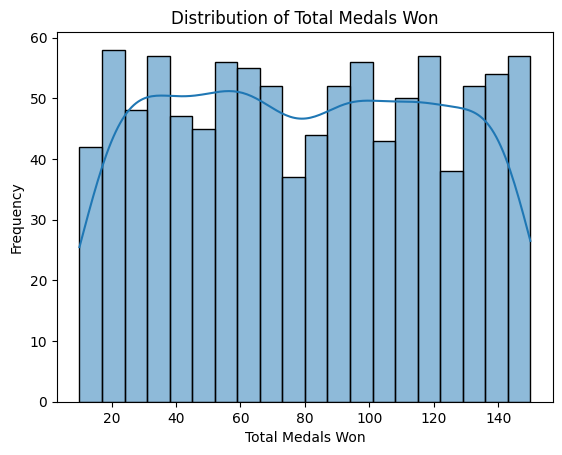

In [5]:
# Distribution of total medals won
sns.histplot(df['Total Medals Won'], bins=20, kde=True)
plt.title('Distribution of Total Medals Won')
plt.xlabel('Total Medals Won')
plt.ylabel('Frequency')
plt.show()

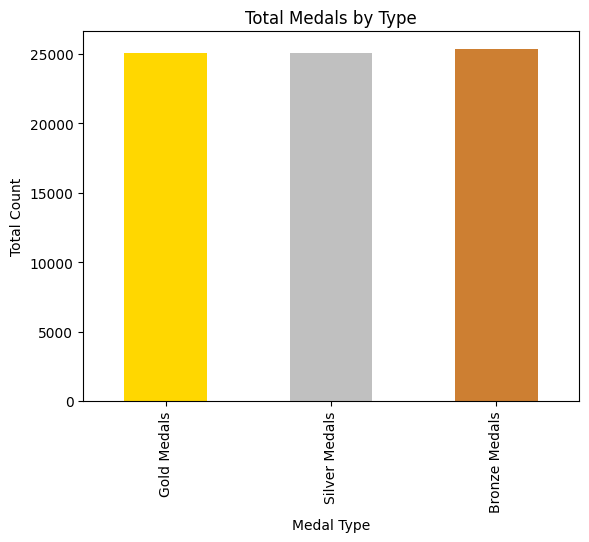

In [6]:
# Medal distribution by type
medal_types = ['Gold Medals', 'Silver Medals', 'Bronze Medals']
df[medal_types].sum().plot(kind='bar', color=['gold', 'silver', '#cd7f32'])
plt.title('Total Medals by Type')
plt.xlabel('Medal Type')
plt.ylabel('Total Count')
plt.show()

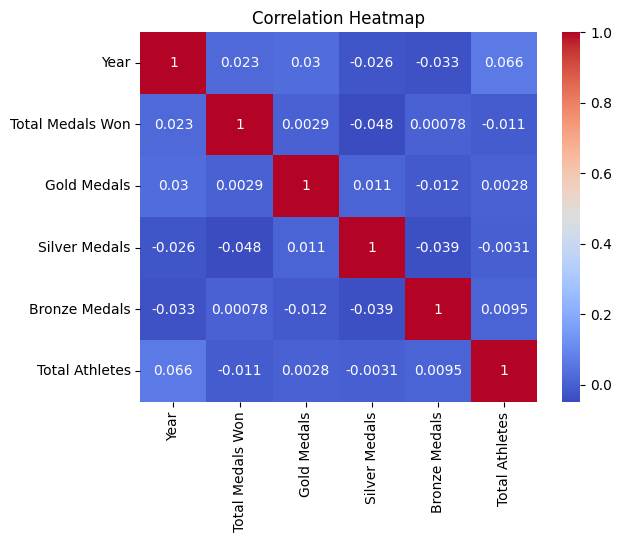

In [7]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Define features and target variable
X = df[['Total Athletes', 'Gold Medals', 'Silver Medals', 'Bronze Medals']]
y = df['Total Medals Won']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1735.4602207968073, -0.02230113466793915)